In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns


In [ ]:
warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
#!pip install gdown
!gdown --id '1D7T3Ue9muT_iQWazHimJz_BJBSxOy5_J' -O train.csv


/usr/local/lib/python3.10/dist-packages/gdown/cli.py:138: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1D7T3Ue9muT_iQWazHimJz_BJBSxOy5_J
From (redirected): https://drive.google.com/uc?id=1D7T3Ue9muT_iQWazHimJz_BJBSxOy5_J&confirm=t&uuid=7392883a-fb4a-4cb6-91a1-d2db61d8fbba
To: /content/train.csv
100% 286M/286M [00:02<00:00, 131MB/s] 


In [ ]:
df = pd.read_csv('train.csv')

<ipython-input-42-cd75a77447fc>:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('train.csv')


In [ ]:
df.head()

,date,source,title,state,zip,mailcode,has_chapter,dob,noexch,recinhse,...,amount,hphone_d,rfa_2r,rfa_2f,rfa_2a,mdmaud_r,mdmaud_f,mdmaud_a,cluster2,geocode2
0,9101,IMA,0,KY,40207-,,,6901,0,,...,NaN,0,L,3,D,X,X,X,4.0,B
1,8601,LIS,2,MI,48504,,,4101,0,,...,NaN,0,L,2,F,X,X,X,49.0,B
2,9601,AGS,28,WA,99218,,,0,0,,...,NaN,0,L,3,E,X,X,X,48.0,B
3,9101,NAD,2,NM,88201,B,,5201,0,,...,34.0,0,L,1,F,X,X,X,39.0,C
4,9201,FRC,0,AL,35603,,,4301,0,,...,NaN,0,L,1,G,X,X,X,16.0,C


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182190 entries, 0 to 182189
Columns: 481 entries, date to geocode2
dtypes: float64(97), int64(310), object(74)
memory usage: 668.6+ MB


In [ ]:
df.describe()

,date,title,dob,age,numchld,income_range,wealth1,hit,mbcraft,mbgarden,...,fistdate,nextdate,timelag,avggift,id,responded,amount,hphone_d,rfa_2f,cluster2
count,182190.000000,182190.000000,182190.000000,137091.000000,23642.000000,141573.000000,96822.000000,182190.000000,81303.000000,81303.000000,...,182190.000000,163192.000000,163192.000000,182190.000000,182190.000000,182190.000000,9249.000000,182190.000000,182190.000000,181940.000000
mean,9141.343746,54.011032,2726.705170,61.593722,1.527747,3.886129,5.349063,3.314781,0.151790,0.058940,...,9135.616422,9151.115594,8.097468,13.334883,91094.500000,0.050766,26.550695,0.501032,1.910039,31.542470
std,343.435045,944.160699,2132.260681,16.662907,0.805797,1.854540,2.742582,9.234371,0.469216,0.261593,...,320.480755,294.266119,8.296798,10.657192,52593.867109,0.219519,21.134328,0.500000,1.073082,18.763625
min,8306.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,7211.000000,0.000000,1.285714,0.000000,0.000000,1.700000,0.000000,1.000000,1.000000
25%,8801.000000,0.000000,201.000000,48.000000,1.000000,2.000000,3.000000,0.000000,0.000000,0.000000,...,8810.000000,8903.000000,4.000000,8.400000,45547.250000,0.000000,17.000000,0.000000,1.000000,15.000000
50%,9201.000000,1.000000,2611.000000,62.000000,1.000000,4.000000,6.000000,0.000000,0.000000,0.000000,...,9201.000000,9204.000000,6.000000,11.647059,91094.500000,0.000000,22.100000,1.000000,2.000000,32.000000
75%,9501.000000,2.000000,4601.000000,75.000000,2.000000,5.000000,8.000000,3.000000,0.000000,0.000000,...,9409.000000,9409.000000,11.000000,15.500000,136641.750000,0.000000,34.000000,1.000000,3.000000,49.000000
max,9701.000000,72002.000000,9710.000000,98.000000,7.000000,7.000000,9.000000,241.000000,6.000000,4.000000,...,9603.000000,9702.000000,1088.000000,1000.000000,182189.000000,1.000000,340.000000,1.000000,4.000000,62.000000


In [ ]:
#Confirming if any responded line item has no amount (0 means False and good to go)
df['responded'][df['amount'].isna()].sum()

0

In [ ]:
# Then we can replace nan in amount with 0
df.loc[:, 'amount'] = df['amount'].fillna(0)

#### We have around 481 coloums and 479 features
#### Let me seperate the external features just for the simplicity of EDA

In [ ]:
# #The following variables reflect characteristics of the customers neighborhood,  collected from the 1990 US Census.

# pop_cols = df.loc[:, 'pop901':'ac2'].columns.tolist()
# pop_df = df[pop_cols].copy()

# pop_df[['id','amount','responded']] = df[['id','amount','responded']]
# df.drop(pop_cols, axis=1, inplace=True)


In [ ]:
# pop_df.head()

In [ ]:
#The fields listed below are from the promotion history file.
#Instead - We shall use the summary variables from the promotion history file for time being.

prom_cols = df.loc[:, 'adate_2':'rfa_24'].columns.tolist()
df.drop(prom_cols, axis=1, inplace=True)

In [ ]:
#The following fields are from the giving history file.
#Instead - We shall use the summary variables from the giving history file for time being. .

hist_cols = df.loc[:, 'rdate_3':'ramnt_24'].columns.tolist()
df.drop(hist_cols, axis=1, inplace=True)
df

,date,source,title,state,zip,mailcode,has_chapter,dob,noexch,recinhse,...,amount,hphone_d,rfa_2r,rfa_2f,rfa_2a,mdmaud_r,mdmaud_f,mdmaud_a,cluster2,geocode2
0,9101,IMA,0,KY,40207-,,,6901,0,,...,0.0,0,L,3,D,X,X,X,4.0,B
1,8601,LIS,2,MI,48504,,,4101,0,,...,0.0,0,L,2,F,X,X,X,49.0,B
2,9601,AGS,28,WA,99218,,,0,0,,...,0.0,0,L,3,E,X,X,X,48.0,B
3,9101,NAD,2,NM,88201,B,,5201,0,,...,34.0,0,L,1,F,X,X,X,39.0,C
4,9201,FRC,0,AL,35603,,,4301,0,,...,0.0,0,L,1,G,X,X,X,16.0,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182185,9401,SYN,0,TN,37422,,,3401,0,,...,0.0,0,L,1,F,X,X,X,23.0,B
182186,9601,MBC,1,IN,46530,,,5401,0,,...,0.0,1,L,1,G,X,X,X,4.0,B
182187,9201,ENQ,2,FL,33021,,,1601,0,,...,0.0,0,L,1,E,X,X,X,19.0,A
182188,9601,L02,28,IL,60426,,,4401,0,,...,0.0,0,L,1,G,X,X,X,26.0,A


In [ ]:
# Coloumns-{malemili,malevet,vietvets,wwiivets,localgov,stategov,fedgov} donot seem to be any relevant here

# #df = df.drop(['malemili', 'malevet', 'vietvets', 'wwiivets', 'localgov', 'stategov', 'fedgov'], axis=1)

In [ ]:
# Coloumns-{'msa', 'adi', 'dma'} are some id seem to be any relevant here

df = df.drop(['malemili', 'malevet', 'vietvets', 'wwiivets', 'localgov', 'stategov', 'fedgov'], axis=1)



In [ ]:
 #df.columns.tolist()

In [ ]:
!gdown --id '1w1tupu9J9XXCDamRYRman0nzh5xrWuf0' -O data_types.csv

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:138: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1w1tupu9J9XXCDamRYRman0nzh5xrWuf0
To: /content/data_types.csv
100% 7.22k/7.22k [00:00<00:00, 19.8MB/s]


In [ ]:
dt = pd.read_csv('data_types.csv')
dt.head()

,Column Name,Data Type,Description
0,date,Date,Origin Date. Date of customer's first gift to ...
1,source,Nominal,Origin Source - (Only 1st 3 bytes are used) - ...
2,title,Nominal,"Customer title code (e.g., 000 = _, 001 = MR.,..."
3,state,Nominal,State abbreviation (a nominal/symbolic field)
4,zip,Nominal,Zipcode (a nominal/symbolic field)


In [ ]:
num_columns = dt[dt['Data Type'].isin(['Discrete', 'Continuous','Ordinal'])]['Column Name']
num_df = df[num_columns]

In [ ]:
for column in num_df.columns:
    description = dt[dt['Column Name'] == column]['Description'].values[0]
    print(f"Column Name: {column}, Description: {description}")
    print(num_df[column].head())
    print()


Column Name: age, Description: Overlay Age (0 = missing)
0    29.0
1    57.0
2     NaN
3    46.0
4    55.0
Name: age, dtype: float64

Column Name: numchld, Description: Number of Children
0    NaN
1    2.0
2    NaN
3    NaN
4    NaN
Name: numchld, dtype: float64

Column Name: income_range, Description: Household income range
0    3.0
1    2.0
2    NaN
3    3.0
4    NaN
Name: income_range, dtype: float64

Column Name: wealth1, Description: Wealth Rating
0    9.0
1    NaN
2    NaN
3    NaN
4    NaN
Name: wealth1, dtype: float64

Column Name: hit, Description: MOR Flag # hit (Mail Order Response). Indicates total number of known times the customer has responded to a mail order offer other than ACE's.
0    0
1    0
2    0
3    0
4    0
Name: hit, dtype: int64

Column Name: mbcraft, Description: Buy Craft Hobby
0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: mbcraft, dtype: float64

Column Name: mbgarden, Description: Buy Gardening
0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: mbgarden, dtype

In [ ]:
num_df.describe()

,age,numchld,income_range,wealth1,hit,mbcraft,mbgarden,mbbooks,mbcolect,magfaml,...,cardpm12,numprm12,ramntall,ngiftall,cardgift,minramnt,maxramnt,lastgift,timelag,avggift
count,137091.000000,23642.000000,141573.000000,96822.000000,182190.000000,81303.000000,81303.000000,81303.000000,81192.000000,81303.000000,...,182190.000000,182190.000000,182190.000000,182190.000000,182190.000000,182190.000000,182190.000000,182190.000000,163192.000000,182190.000000
mean,61.593722,1.527747,3.886129,5.349063,3.314781,0.151790,0.058940,1.114719,0.064157,0.447388,...,5.349333,12.859065,104.465347,9.601932,5.057819,7.921269,19.983080,17.294422,8.097468,13.334883
std,16.662907,0.805797,1.854540,2.742582,9.234371,0.469216,0.261593,1.667029,0.297601,0.819394,...,1.220220,4.548855,118.732713,8.553655,4.524780,8.653835,25.268966,13.809306,8.296798,10.657192
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,13.000000,1.000000,0.000000,0.000000,5.000000,0.000000,0.000000,1.285714
25%,48.000000,1.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.000000,11.000000,40.000000,3.000000,2.000000,3.000000,14.000000,10.000000,4.000000,8.400000
50%,62.000000,1.000000,4.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,6.000000,12.000000,78.000000,7.000000,4.000000,5.000000,17.000000,15.000000,6.000000,11.647059
75%,75.000000,2.000000,5.000000,8.000000,3.000000,0.000000,0.000000,2.000000,0.000000,1.000000,...,6.000000,13.000000,131.000000,13.000000,7.000000,10.000000,23.000000,20.000000,11.000000,15.500000
max,98.000000,7.000000,7.000000,9.000000,241.000000,6.000000,4.000000,9.000000,6.000000,9.000000,...,19.000000,78.000000,9485.000000,237.000000,41.000000,1000.000000,5000.000000,1000.000000,1088.000000,1000.000000


In [ ]:
#mean imputuation on age and income_range
coloumns_to_impute = ['age', 'income_range','wealth1','wealth2']
df.loc[:, coloumns_to_impute] = df[coloumns_to_impute].fillna(df[coloumns_to_impute].mean())
coloumns_to_fillna = ['numchld','nextdate', 'timelag','mbcraft', 'mbgarden', 'mbbooks', 'mbcolect', 'magfaml', 'magfem', 'magmale',
    'pubgardn', 'pubculin', 'pubhlth','pubdoity','pubnewfn', 'pubphoto', 'pubopp']
df[coloumns_to_fillna] = df[coloumns_to_fillna].fillna(0)
df.head()

,date,source,title,state,zip,mailcode,has_chapter,dob,noexch,recinhse,...,amount,hphone_d,rfa_2r,rfa_2f,rfa_2a,mdmaud_r,mdmaud_f,mdmaud_a,cluster2,geocode2
0,9101,IMA,0,KY,40207-,,,6901,0,,...,0.0,0,L,3,D,X,X,X,4.0,B
1,8601,LIS,2,MI,48504,,,4101,0,,...,0.0,0,L,2,F,X,X,X,49.0,B
2,9601,AGS,28,WA,99218,,,0,0,,...,0.0,0,L,3,E,X,X,X,48.0,B
3,9101,NAD,2,NM,88201,B,,5201,0,,...,34.0,0,L,1,F,X,X,X,39.0,C
4,9201,FRC,0,AL,35603,,,4301,0,,...,0.0,0,L,1,G,X,X,X,16.0,C


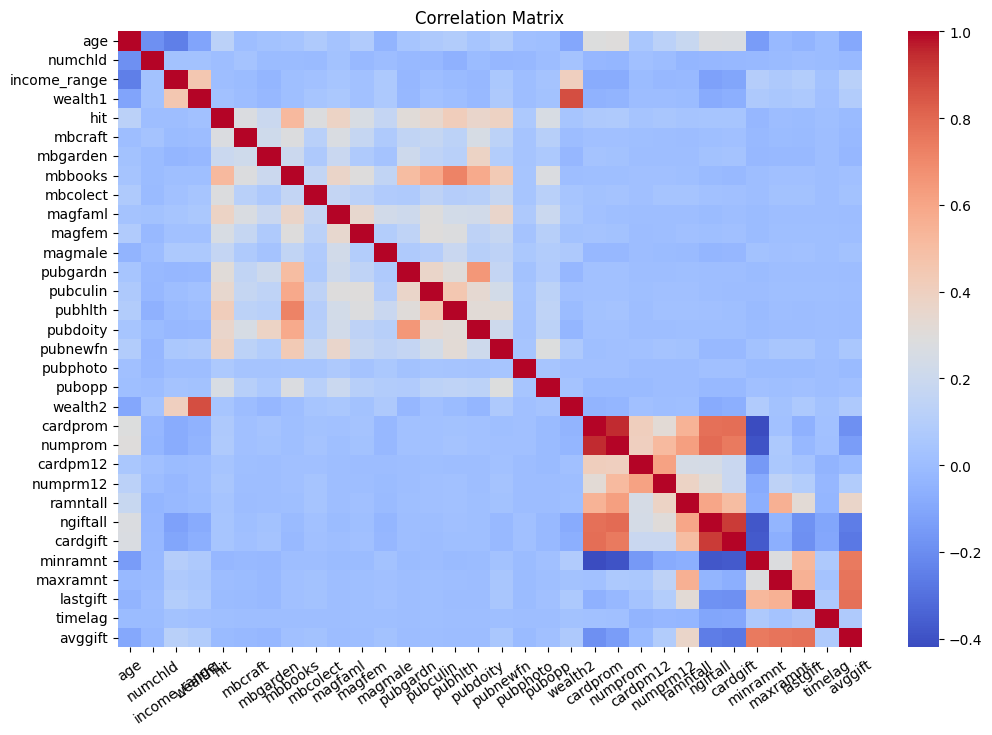

In [ ]:
num_df.corr()
plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(num_df.corr(), annot=False, cmap='coolwarm')
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=35)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
catn_columns = dt[dt['Data Type'].isin(['Nominal'])]['Column Name']
catn_df = df[catn_columns]
catn_df.drop(['source', 'zip'], axis=1, inplace=True)
df.drop(['source', 'zip'], axis=1, inplace=True)
df.head()

<ipython-input-62-cbac5e631bb0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  catn_df.drop(['source', 'zip'], axis=1, inplace=True)


,date,title,state,mailcode,has_chapter,dob,noexch,recinhse,recp3,recpgvg,...,amount,hphone_d,rfa_2r,rfa_2f,rfa_2a,mdmaud_r,mdmaud_f,mdmaud_a,cluster2,geocode2
0,9101,0,KY,,,6901,0,,,,...,0.0,0,L,3,D,X,X,X,4.0,B
1,8601,2,MI,,,4101,0,,,,...,0.0,0,L,2,F,X,X,X,49.0,B
2,9601,28,WA,,,0,0,,,,...,0.0,0,L,3,E,X,X,X,48.0,B
3,9101,2,NM,B,,5201,0,,,,...,34.0,0,L,1,F,X,X,X,39.0,C
4,9201,0,AL,,,4301,0,,,,...,0.0,0,L,1,G,X,X,X,16.0,C


In [ ]:
for column in catn_columns:
    description = dt[dt['Column Name'] == column]['Description'].values[0]
    print(f"Column Name: {column}, Description: {description}")
    print()

Column Name: source, Description: Origin Source - (Only 1st 3 bytes are used) - Defaulted to 00000 for conversion - Code indicating which mailing list the customer was originally acquired from - A nominal or symbolic field.

Column Name: title, Description: Customer title code (e.g., 000 = _, 001 = MR., 001001 = MESSRS., etc.)

Column Name: state, Description: State abbreviation (a nominal/symbolic field)

Column Name: zip, Description: Zipcode (a nominal/symbolic field)

Column Name: mdmaud, Description: The Major customer Matrix code. Describes frequency and amount of giving. An RFA (recency/frequency/monetary) field. Includes bytes for recency of giving, frequency of giving, amount of giving, and a filler.

Column Name: domain, Description: Domain/Cluster code. A nominal or symbolic field. Includes bytes for urbanicity level and socio-economic status of the neighborhood.

Column Name: cluster, Description: Code indicating which cluster group the customer falls into, unique in terms 

In [ ]:
# One-hot encode the specified columns and drop the original columns
df = pd.get_dummies(df, columns=catn_df.columns)
df.head()

,date,mailcode,has_chapter,dob,noexch,recinhse,recp3,recpgvg,recsweep,age,...,dma_820.0,dma_821.0,dma_825.0,dma_828.0,dma_839.0,dma_855.0,dma_862.0,dma_866.0,dma_868.0,dma_881.0
0,9101,,,6901,0,,,,,29.000000,...,0,0,0,0,0,0,0,0,0,0
1,8601,,,4101,0,,,,,57.000000,...,0,0,0,0,0,0,0,0,0,0
2,9601,,,0,0,,,,,61.593722,...,0,0,0,0,0,0,0,0,0,1
3,9101,B,,5201,0,,,,,46.000000,...,0,0,0,0,0,0,0,0,0,0
4,9201,,,4301,0,,,,,55.000000,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
date_columns = dt[dt['Data Type'].isin(['Date'])]['Column Name']
date_columns

0         date
7          dob
69    maxadate
77    minrdate
79    maxrdate
81    lastdate
82    fistdate
83    nextdate
Name: Column Name, dtype: object

In [ ]:
for column in date_columns:
    description = dt[dt['Column Name'] == column]['Description'].values[0]
    print(f"Column Name: {column}, Description: {description}")
    print(df[column].head())
    print()

Column Name: date, Description: Origin Date. Date of customer's first gift to ACE YYMM format (Year/Month).
0    9101
1    8601
2    9601
3    9101
4    9201
Name: date, dtype: int64

Column Name: dob, Description: Date of birth (YYMM, Year/Month format.)
0    6901
1    4101
2       0
3    5201
4    4301
Name: dob, dtype: int64

Column Name: maxadate, Description: Date of the most recent promotion received (in YYMM, Year/Month format)
0    9702
1    9702
2    9702
3    9702
4    9702
Name: maxadate, dtype: int64

Column Name: minrdate, Description: Date associated with the smallest gift to date
0    9207
1    8706
2    9603
3    9209
4    9512
Name: minrdate, dtype: int64

Column Name: maxrdate, Description: Date associated with the largest gift to date
0    9206
1    9504
2    9601
3    9506
4    9412
Name: maxrdate, dtype: int64

Column Name: lastdate, Description: Date associated with the most recent gift
0    9512
1    9508
2    9603
3    9506
4    9512
Name: lastdate, dtype: int64

In [ ]:
df['dob'].value_counts().get(0, 0)

45092

In [ ]:
df['dob'] = df['dob'].replace(0, np.nan).fillna(df['dob'].replace(0, np.nan).mean())

In [ ]:
bin_columns = dt[dt['Data Type'].isin(['Binary'])]['Column Name']
bin_df = df[bin_columns]
df = pd.get_dummies(df, columns=bin_columns, drop_first=True)
df.head()

,date,dob,age,numchld,income_range,wealth1,hit,mbcraft,mbgarden,mbbooks,...,crafts_Y,fisher_Y,gardenin_Y,boats_Y,walker_Y,kidstuff_Y,cards_Y,plates_Y,pepstrfl_X,hphone_d_1
0,9101,6901.000000,29.000000,0.0,3.000000,9.000000,0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,8601,4101.000000,57.000000,2.0,2.000000,5.349063,0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,9601,3623.527805,61.593722,0.0,3.886129,5.349063,0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,9101,5201.000000,46.000000,0.0,3.000000,5.349063,0,0.0,0.0,0.0,...,1,0,0,0,1,0,0,0,0,0
4,9201,4301.000000,55.000000,0.0,3.886129,5.349063,0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [ ]:
df.describe()

,date,dob,age,numchld,income_range,wealth1,hit,mbcraft,mbgarden,mbbooks,...,crafts_Y,fisher_Y,gardenin_Y,boats_Y,walker_Y,kidstuff_Y,cards_Y,plates_Y,pepstrfl_X,hphone_d_1
count,1.821900e+05,1.821900e+05,1.821900e+05,1.821900e+05,1.821900e+05,1.821900e+05,1.821900e+05,1.821900e+05,1.821900e+05,1.821900e+05,...,1.821900e+05,1.821900e+05,1.821900e+05,1.821900e+05,1.821900e+05,1.821900e+05,1.821900e+05,1.821900e+05,1.821900e+05,1.821900e+05
mean,2.401723e-15,-2.842912e-16,-1.636210e-15,2.586681e-17,-6.754817e-17,-8.434551e-16,8.648271e-18,-1.521004e-17,3.032257e-17,-1.287003e-18,...,3.658209e-17,-3.970210e-17,6.286815e-17,7.784419e-17,2.020205e-17,-1.961705e-17,1.333803e-17,-3.939010e-17,3.591909e-17,-1.226650e-16
std,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,...,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00
min,-2.432326e+00,-2.499104e+00,-4.192145e+00,-3.361477e-01,-1.765441e+00,-2.675443e+00,-3.589622e-01,-2.101028e-01,-1.484424e-01,-3.999239e-01,...,-3.068475e-01,-2.842374e-01,-4.045156e-01,-1.471817e-01,-3.515822e-01,-1.278475e-01,-1.047930e-01,-7.664440e-02,-9.499631e-01,-1.002066e+00
25%,-9.910016e-01,-7.012805e-01,-6.637366e-01,-3.361477e-01,-5.420439e-01,-1.745911e-01,-3.589622e-01,-2.101028e-01,-1.484424e-01,-3.999239e-01,...,-3.068475e-01,-2.842374e-01,-4.045156e-01,-1.471817e-01,-3.515822e-01,-1.278475e-01,-1.047930e-01,-7.664440e-02,-9.499631e-01,-1.002066e+00
50%,1.737051e-01,-3.137204e-16,-1.474756e-15,-3.361477e-01,0.000000e+00,-8.884810e-16,-3.589622e-01,-2.101028e-01,-1.484424e-01,-3.999239e-01,...,-3.068475e-01,-2.842374e-01,-4.045156e-01,-1.471817e-01,-3.515822e-01,-1.278475e-01,-1.047930e-01,-7.664440e-02,-9.499631e-01,9.979383e-01
75%,1.047235e+00,6.743369e-01,6.507683e-01,-3.361477e-01,6.813529e-01,3.255793e-01,-3.408810e-02,-2.101028e-01,-1.484424e-01,-3.999239e-01,...,-3.068475e-01,-2.842374e-01,-4.045156e-01,-1.471817e-01,-3.515822e-01,-1.278475e-01,-1.047930e-01,-7.664440e-02,1.052672e+00,9.979383e-01
max,1.629588e+00,4.198926e+00,2.518749e+00,1.153293e+01,1.904750e+00,1.826090e+00,2.573926e+01,1.840036e+01,2.242645e+01,6.835640e+00,...,3.258948e+00,3.518186e+00,2.472092e+00,6.794323e+00,2.844285e+00,7.821821e+00,9.542623e+00,1.304727e+01,1.052672e+00,9.979383e-01


In [ ]:
df.amount

0        -0.179091
1        -0.179091
2        -0.179091
3         4.338507
4        -0.179091
            ...   
182185   -0.179091
182186   -0.179091
182187   -0.179091
182188   -0.179091
182189   -0.179091
Name: amount, Length: 182190, dtype: float64

In [ ]:
df = df.drop(['amount', 'responded'], axis=1)



In [ ]:
from sklearn.cluster import KMeans
import warnings

In [ ]:
features = df
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# elbow method
distortions = []
K_range = range(1, 8)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=38)
    kmeans.fit(features)
    distortions.append(kmeans.inertia_)

plt.plot(K_range, distortions, marker='o')
plt.xlabel('k')
plt.ylabel('WCSS')
plt.show()